In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
pip install seaborn

     |████████████████████████████████| 283 kB 111 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('cleaned_data.csv')

In [5]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [6]:
#corr() function calculates the correlation btw the 2 variablesbased on pearson method
#the value ranges btw negative to positive
#if the value is negative(it says that if one value increases other decreases)
#if positive (it says that if one increases other increases)
#formula to find correlation using pearson is r=n summation(xy) - summation (x)(summation(y))/nsummation(x^2)-summation(x)^2[Nsummation(y)^2-(summationy)^2]
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


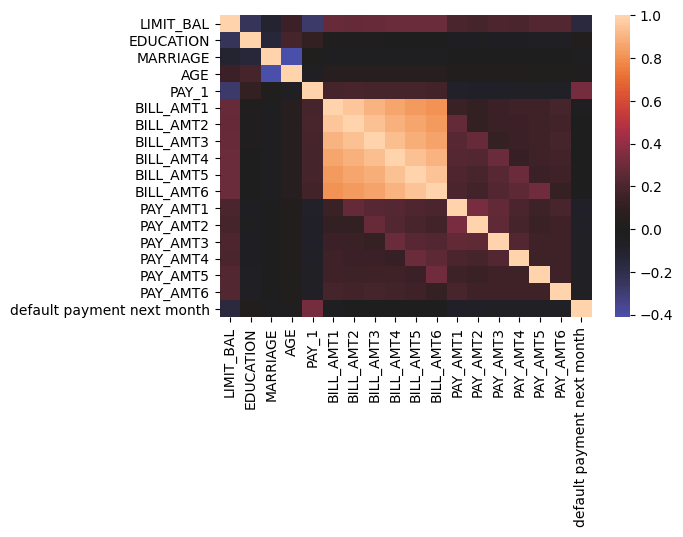

In [7]:
#heatmaps are used to make visualizations from the corr() 
#from heatmaps we can come to know which features are highly correlated(i.e associated with each other) 
#if variable has high correlation then it is best to be selected for prediction
#pay_1 and limit_bal is best to be selected for prediction
plt.figure(dpi=100)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)
plt.show()

In [8]:
#to perform the anova F-test
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [15]:
#ANOVA F-TEST are used to find which are the parameters that are vital in building model
#F(named by a person called fisher)=variation btw sample means / variation within samples
#we perform analysis of variance (if the group mean is clustered close to overall mean then variance is low)
#if group mean is clustered far from group mean varaince is high
#f_classif is the functon used for performing the ANOVA F-test
#it returns the p value and f_stat for each value
#it is used for feature selection
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)


In [16]:
#creating the datafame for each feature_response variable  with their f statistic and p value 
#after creating the f_test_df -----it is being sorted using the sort function based on the pvalue
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [17]:
#select kbest can aslo be used to select the best features from the ANOVA F-TEST
#selectpercentile is used only to get 20 percent of the feature

from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [22]:
#to get the feature name whose percentile 20 % more than that of the highest score
#get_support will give the column names of the feature(it returns the indexes)
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [23]:
features = features_response[:-1]

In [21]:
#to get 20 percent of the best features
#using the index array that we created using the get_support() it is to get the best features out of them
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [ ]:
#The conclusions we can draw from the DataFrame of F-statistics and p-values are similar to what we observed in the correlation plot: PAY_1 and LIMIT_BAL appear to be the most useful features. They have the smallest p-values, indicating the average values of these features between the positive and negative classes are significantly different, and these features will help predict which class a sample belongs to.

In [24]:
#PAY_1 AND LIMIT_BAL has the smallest value and they are the best features

In [25]:
#visualizing the relation between the features and the response variables

In [26]:
#calculating the mean value of the response variable(default payment next month)
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [30]:
#agg function is used to pass a function name to be called 
#here we are grouping by the pay_1 and applying the mean function over it on each group
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


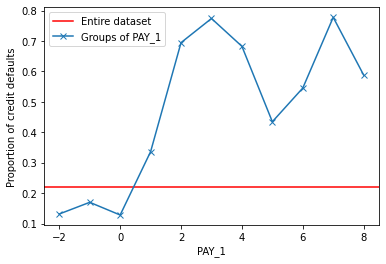

In [31]:
axes = plt.axes()
#creating axes object on the axes variable
# plotting a red horizontal line on the axes
#axhline() is the function in pyplot module of matplotlib libraray is used to add a horizontal line acroos the asxis
#the horizontal line indicates the mean valaue of the response variable(default payment next month).mean()
#to plot the group by values that are being calculated
axes.axhline(overall_default_rate, color = "red")

group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

plt.show()

In [ ]:
#Our visualization of payment statuses has revealed a clear, and probably expected, story: those who defaulted before, are in fact more likely to default again. The default rate of accounts in good standing is well below the overall default rate, which we know from before is about 22%. However, at least 30% of the accounts that were in default last month will be in default again next month, according to this. This is a good visual to share with our business partner as it shows the effect of what may be the most important feature in our model.

Text(0.5, 1.0, 'Credit limits by response variable')

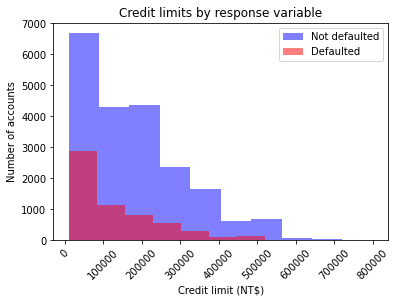

In [34]:
#first 2 steps creating the logical mask for both the varaibles
#steps to create the dual histogram
pos_mask = y == 1
neg_mask = y == 0
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [ ]:
#After some experimentation, we decide to make a histogram with 16 bins. Since the maximum credit limit is NT$800,000, we use range with an increment of NT$50000

In [35]:
#tocreate the bins with 16

In [36]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

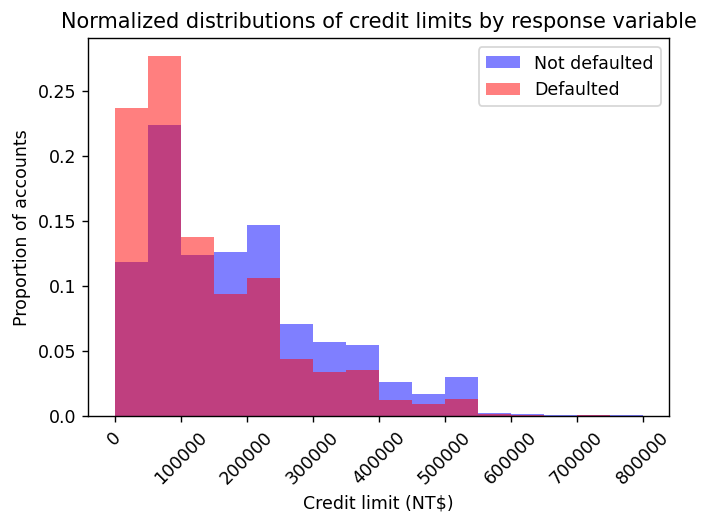

In [39]:
#same graph with different bins
#figure.dpi gives the resolution of the dots
#same graph with different bins
#density=True is to normalize the histogram
mpl.rcParams['figure.dpi'] = 125
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [45]:
#to create an array of numbers using linspace
#this linspace takes the starting and the end points to form an array
#linspace works similar to that of range but this produces decimal points

X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])
#exp function is used to find the exponent of each value
Y_exp = np.exp(X_exp)
print(Y_exp[:5])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]
[0.01831564 0.02024191 0.02237077 0.02472353 0.02732372]


Text(0.5, 1.0, 'Plot of $e^X$')

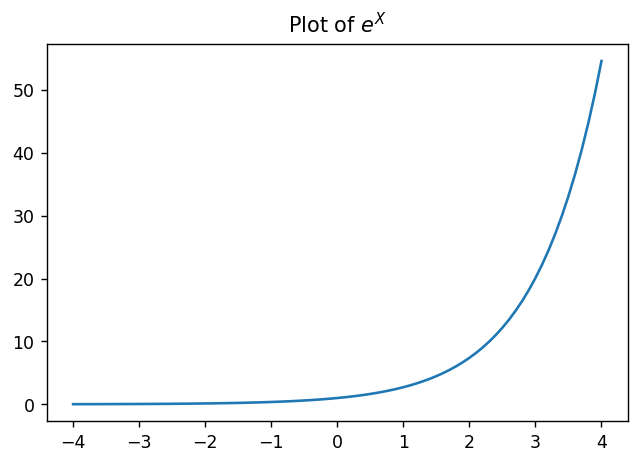

In [41]:
#here we are uisng the x_exp and y_exp that was created previously the plot of exponenetial funcation 
#between the values [-4,4]
#we are plotting the exponential function

plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')
#we can observe that as x increases y also slowly increases

Text(0.5, 1.0, 'Plot of $e^{-X}$')

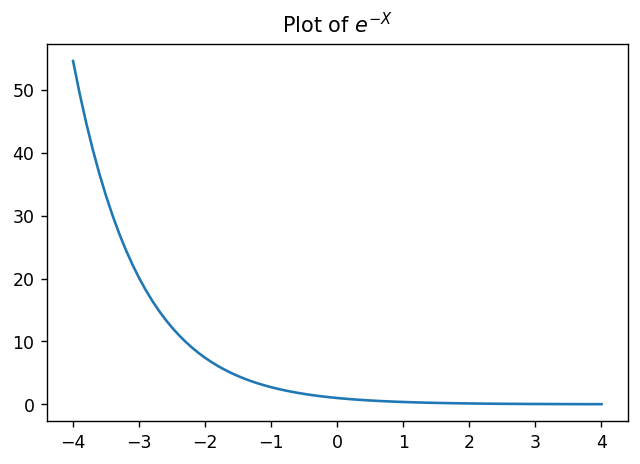

In [42]:
#plotting e-x which is the reflection of the ex above the y axis
#here we are analysing with e-x
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [46]:
#a sigmoid function is a mathematical function having a characterstic of S-SHAPED curve
#logistic regression is the special case of the linear regression it predicts the value based using log function
#sigmoid function is a function which takes any real value and mapps it between o to 1
#the function is y=1/1+e^-z
#if the value of z goes to positive infinity then the predicted valu of y will become 1
#if it goes ti negative infinity then the prediction value will become 0
#if the outcome of the sigmoid function is more than 0.5 then we classify the label at class 1 or positive class
#if it is less than 0.5 then it belongs to negative class
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

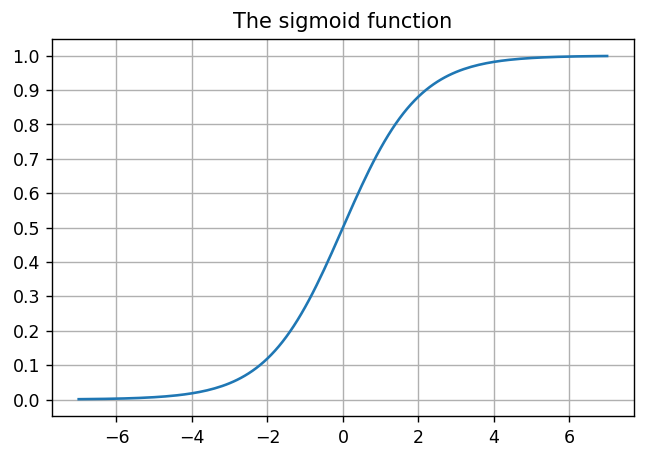

In [71]:
#we are creating the range of values in order to plot the sigmoid function for it
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')


In [48]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [72]:
#logistic regression is linear in nature
#because we are checking wether the features have a linear combination
#now we are going to discover the appropriatness of the feature
#we are going to determine the appropriatness of the pay_1 variable
p = group_by_pay_mean_y['default payment next month'].values

In [73]:
p

array([0.13166397, 0.17000198, 0.12829525, 0.33639988, 0.69470143,
       0.7739726 , 0.68253968, 0.43478261, 0.54545455, 0.77777778,
       0.58823529])

In [51]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [52]:
#we are finfing the natural log of the values
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [53]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

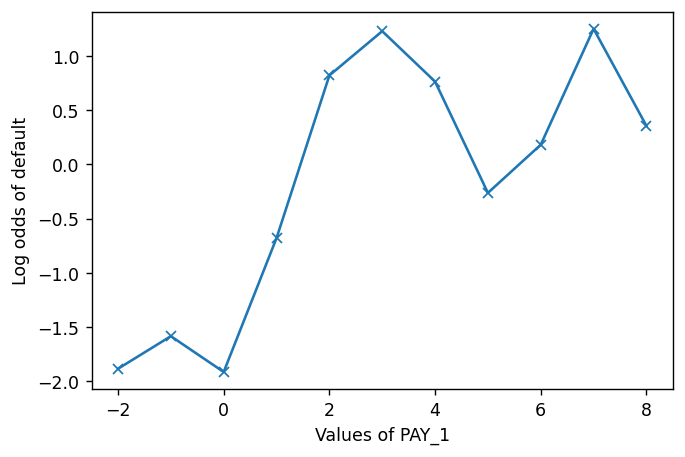

In [75]:
#plotting the plot btw group_by_mean_y and log_odds
#it is used to determine the linearity
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [77]:
#linear decision boundary of logistic regression
#we generate the data using uniform function between the values
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


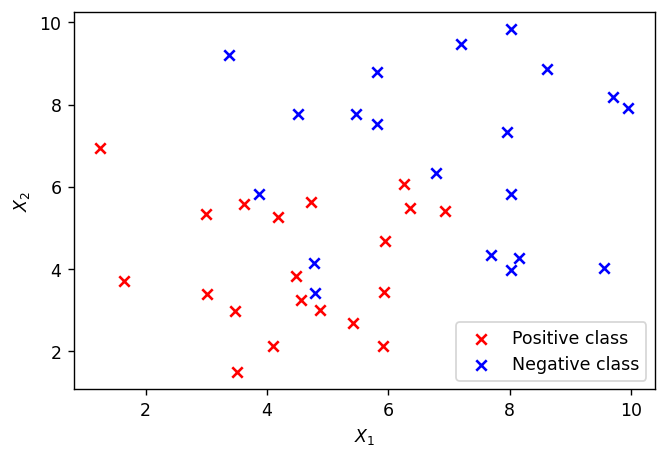

In [56]:
#scatter plot for the synthetic data that was generated
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [57]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [58]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [78]:
#in previous task we used only education varaible perform thr logistic regression
#now pay_1 and limit_bal which is proven to be the best features by pearson correlation and ANOVA F-tesr

from sklearn.model_selection import train_test_split
X = df[['PAY_1', 'LIMIT_BAL']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 2), (21331,), (5333, 2), (5333,))

In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
#liblinear is the linear classifier for data with millions of instances and features
lr_model = LogisticRegression(solver = 'liblinear')

In [82]:
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [83]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [84]:
y_proba = lr_model.predict_proba(X_test)
y_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

In [65]:
coef = lr_model.coef_
intercept = lr_model.intercept_

In [85]:
#applying the sigmoid function
manual_y_proba = sigmoid((coef * X_test.values) + intercept)
manual_y_proba

array([[0.5       , 0.25173076],
       [0.5       , 0.415703  ],
       [0.5       , 0.20395547],
       ...,
       [0.5       , 0.415703  ],
       [0.5       , 0.17278502],
       [0.5       , 0.33606565]])

In [67]:
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:, 1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)        

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
pos = y_pred == 1
neg = y_pred == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")
print(f"Positives = {sum(manual_pos)} and Negatives = {sum(manual_neg)} are maually predicted classes.")

Positives = 0 and Negatives = 5333 are predicted classes.
Positives = 0 and Negatives = 5333 are maually predicted classes.


In [69]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics

print(f"ROC AUC Score for predicted probabilities: {metrics.roc_auc_score(y_test, y_proba[:, 1])}")

ROC AUC Score for predicted probabilities: 0.627207450280691


In [86]:
#calculating the roc_auc_score
print(f"ROC AUC Score for manually predicted probabilities: {metrics.roc_auc_score(y_test, manual_y_proba[:, 1])}")

ROC AUC Score for manually predicted probabilities: 0.6201990844642832
